# Health Care Analysis

**Dataset Info:**
Sample Data Set containing patient data along with the appointment details


In [34]:
#import the required libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt

**Load the data file **

In [35]:
df = pd.read_csv('Data.csv')

#Excel: pd.read_excel
#Text: pd.read_csv sep: ' ' ',' ';' ':'

In [36]:
type(df)

pandas.core.frame.DataFrame

In [37]:
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


Look at the top 5 records of data

In [38]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Check the various attributes of data like shape (rows and cols), Columns, datatypes

In [39]:
df.shape

(110527, 14)

In [40]:
df.columns.values

array(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship',
       'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap',
       'SMS_received', 'No-show'], dtype=object)

In [41]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [42]:
# Checking the data types of all the columns
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [43]:
#modifying the date and time into standard form
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.date.astype('datetime64[ns]')
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date.astype('datetime64[ns]')

In [44]:
# 5 is Saturday, 6 is Sunday 

df['sch_weekday'] = df['ScheduledDay'].dt.dayofweek

In [45]:
df['app_weekday'] = df['AppointmentDay'].dt.dayofweek

In [46]:
df['sch_weekday'].value_counts()

1    26168
2    24262
0    23085
4    18915
3    18073
5       24
Name: sch_weekday, dtype: int64

In [47]:
df['app_weekday'].value_counts()

2    25867
1    25640
0    22715
4    19019
3    17247
5       39
Name: app_weekday, dtype: int64

In [48]:
#drop columns which are not necessary
df.drop(columns= ['PatientId','AppointmentID','ScheduledDay','AppointmentDay','Neighbourhood'], axis=1, inplace=True)


In [49]:
# Check the descriptive statistics of numeric variables
df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,sch_weekday,app_weekday
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,1.851955,1.858243
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,1.378520,1.371672
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,3.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,5.000000,5.000000


All the columns except age is categorical hence the 25%-50%-75% distribution of those categorical data is not propoer

75% patients have age less than 55 years


In [50]:
df['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

In [51]:
df['No-show'].value_counts()/len(df)*100

No     79.806744
Yes    20.193256
Name: No-show, dtype: float64

<Axes: >

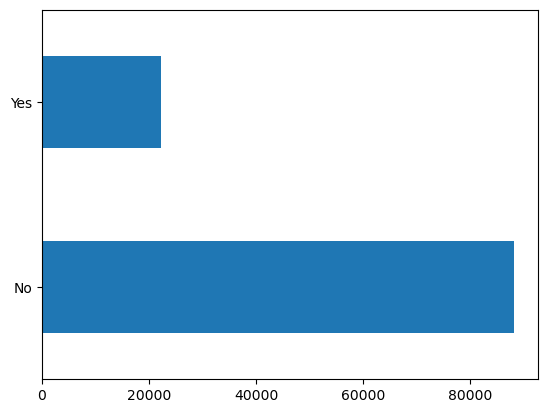

In [52]:
df['No-show'].value_counts().plot(kind='barh')

<Axes: >

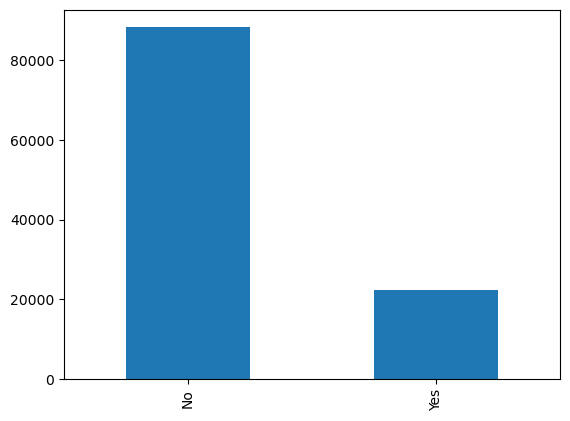

In [53]:
df['No-show'].value_counts().plot(kind='bar')

<Axes: ylabel='No-show'>

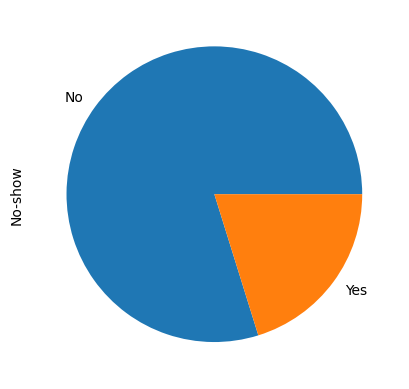

In [54]:
df['No-show'].value_counts().plot(kind='pie')

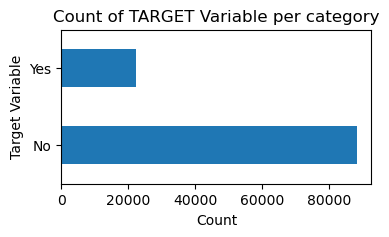

In [55]:
df['No-show'].value_counts().plot(kind='barh', figsize=(4, 2))
plt.xlabel("Count")
plt.ylabel("Target Variable")
plt.title("Count of TARGET Variable per category");

* Data is highly imbalanced, ratio = 80:20<br>
* So we analyse the data with other features while taking the target values separately to get some insights.

In [56]:

df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Gender        110527 non-null  object
 1   Age           110527 non-null  int64 
 2   Scholarship   110527 non-null  int64 
 3   Hipertension  110527 non-null  int64 
 4   Diabetes      110527 non-null  int64 
 5   Alcoholism    110527 non-null  int64 
 6   Handcap       110527 non-null  int64 
 7   SMS_received  110527 non-null  int64 
 8   No-show       110527 non-null  object
 9   sch_weekday   110527 non-null  int64 
 10  app_weekday   110527 non-null  int64 
dtypes: int64(9), object(2)
memory usage: 9.3+ MB


In [57]:
df.isnull().sum()

Gender          0
Age             0
Scholarship     0
Hipertension    0
Diabetes        0
Alcoholism      0
Handcap         0
SMS_received    0
No-show         0
sch_weekday     0
app_weekday     0
dtype: int64

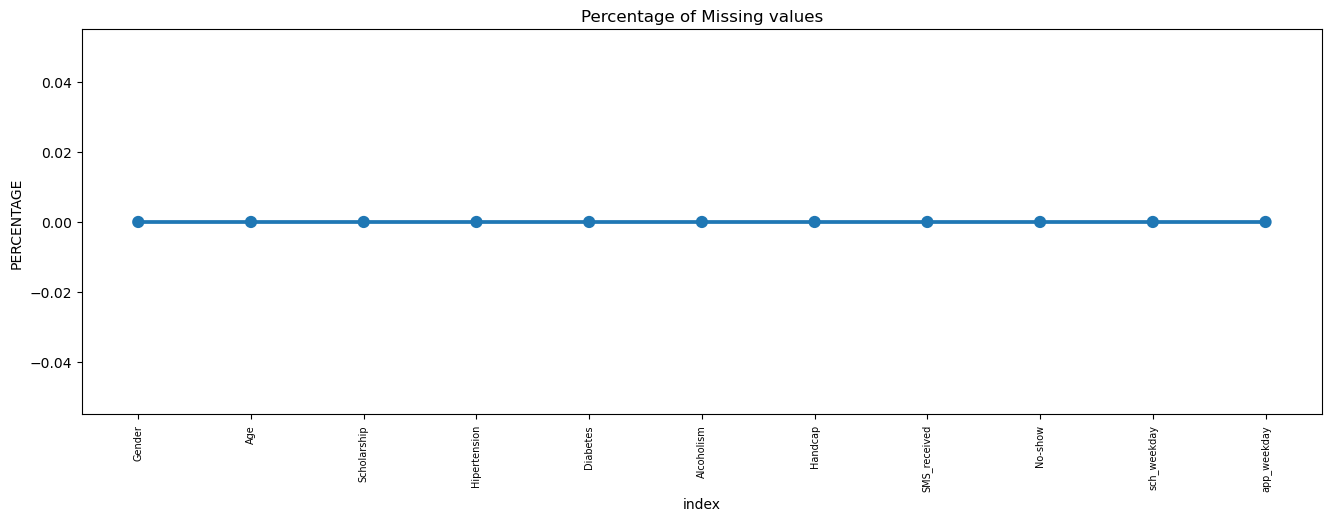

In [58]:
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index',y=0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

#Missing Data - Initial Intuiti
There is no missing value in the data.

## Data Cleaning


**1.** Create a copy of base data for manupulation & processing

In [59]:
new_df = df.copy()

In [60]:
new_df.dtypes

Gender          object
Age              int64
Scholarship      int64
Hipertension     int64
Diabetes         int64
Alcoholism       int64
Handcap          int64
SMS_received     int64
No-show         object
sch_weekday      int64
app_weekday      int64
dtype: object

In [61]:
new_df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,sch_weekday,app_weekday
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,1.851955,1.858243
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,1.378520,1.371672
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,3.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,5.000000,5.000000


In [62]:
new_df['Age'].describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [63]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Gender        110527 non-null  object
 1   Age           110527 non-null  int64 
 2   Scholarship   110527 non-null  int64 
 3   Hipertension  110527 non-null  int64 
 4   Diabetes      110527 non-null  int64 
 5   Alcoholism    110527 non-null  int64 
 6   Handcap       110527 non-null  int64 
 7   SMS_received  110527 non-null  int64 
 8   No-show       110527 non-null  object
 9   sch_weekday   110527 non-null  int64 
 10  app_weekday   110527 non-null  int64 
dtypes: int64(9), object(2)
memory usage: 9.3+ MB


#In this data we can see that minimum number of age is 1 but we know that age cant be in negative.

Negative age value Treatement**
     

In [64]:
new_df.loc[new_df ['Age']==-1]

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,sch_weekday,app_weekday
99832,F,-1,0,0,0,0,0,0,No,0,0


#We can see that only one record has age as -1 which can be dropped.

In [65]:
new_df = new_df.drop(new_df[new_df['Age'] == -1].index)

In [66]:
new_df.loc[new_df ['Age']==-1]

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,sch_weekday,app_weekday


#The record with age as -1 is deleted now

In [67]:
new_df.shape

(110526, 11)

In [68]:
new_df.head(5)

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,sch_weekday,app_weekday
0,F,62,0,1,0,0,0,0,No,4,4
1,M,56,0,0,0,0,0,0,No,4,4
2,F,62,0,0,0,0,0,0,No,4,4
3,F,8,0,0,0,0,0,0,No,4,4
4,F,56,0,1,1,0,0,0,No,4,4


**5.** Divide customers into bins based on age e.g. for age < 28 years: assign a age group of 0-28, for age between 29 to  58 Yrs, tenure group of 16-32; so on...

In [69]:
# Get the max age
print(new_df['Age'].max()) 

115


In [70]:
labels = ["{0} - {1}".format(i, i + 28) for i in range(0, 115, 29)]

print(labels)

['0 - 28', '29 - 57', '58 - 86', '87 - 115']


In [71]:
new_df['Age_group'] = pd.cut(new_df.Age, range(0, 120, 29), right=False, labels=labels)

In [72]:
new_df['Age_group'].value_counts()

29 - 57     43553
0 - 28      42707
58 - 86     23366
87 - 115      900
Name: Age_group, dtype: int64

In [73]:
#drop column 'PatientId','AppointmentID','Age'
new_df.drop(columns= ['Age', axis=1, inplace=True)


SyntaxError: closing parenthesis ')' does not match opening parenthesis '[' (62146779.py, line 2)

In [74]:
new_df.head()

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,sch_weekday,app_weekday,Age_group
0,F,62,0,1,0,0,0,0,No,4,4,58 - 86
1,M,56,0,0,0,0,0,0,No,4,4,29 - 57
2,F,62,0,0,0,0,0,0,No,4,4,58 - 86
3,F,8,0,0,0,0,0,0,No,4,4,0 - 28
4,F,56,0,1,1,0,0,0,No,4,4,29 - 57


**6.** Remove columns not required for processing

In [75]:
new_df.head()

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,sch_weekday,app_weekday,Age_group
0,F,62,0,1,0,0,0,0,No,4,4,58 - 86
1,M,56,0,0,0,0,0,0,No,4,4,29 - 57
2,F,62,0,0,0,0,0,0,No,4,4,58 - 86
3,F,8,0,0,0,0,0,0,No,4,4,0 - 28
4,F,56,0,1,1,0,0,0,No,4,4,29 - 57


In [76]:
#drop column 'PatientId','AppointmentID','Age'
new_df.drop(columns= ['Age'], axis=1, inplace=True)

In [77]:
new_df.head()

,Gender,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,sch_weekday,app_weekday,Age_group
0,F,0,1,0,0,0,0,No,4,4,58 - 86
1,M,0,0,0,0,0,0,No,4,4,29 - 57
2,F,0,0,0,0,0,0,No,4,4,58 - 86
3,F,0,0,0,0,0,0,No,4,4,0 - 28
4,F,0,1,1,0,0,0,No,4,4,29 - 57


## Data Exploration
**1. ** Plot distibution of individual predictors by churn

### Univariate Analysis

In [78]:
new_df.head(5)

,Gender,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,sch_weekday,app_weekday,Age_group
0,F,0,1,0,0,0,0,No,4,4,58 - 86
1,M,0,0,0,0,0,0,No,4,4,29 - 57
2,F,0,0,0,0,0,0,No,4,4,58 - 86
3,F,0,0,0,0,0,0,No,4,4,0 - 28
4,F,0,1,1,0,0,0,No,4,4,29 - 57


In [79]:
new_df['No-show'].value_counts()/len(new_df)*100

No     79.806561
Yes    20.193439
Name: No-show, dtype: float64

<Axes: xlabel='Gender', ylabel='count'>

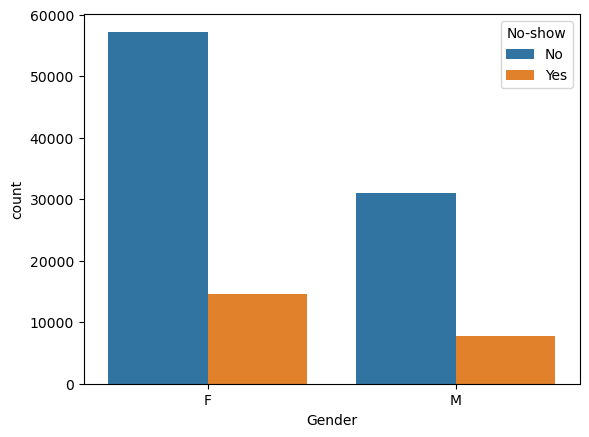

In [80]:
sns.countplot(data=new_df, x='Gender', hue='No-show')

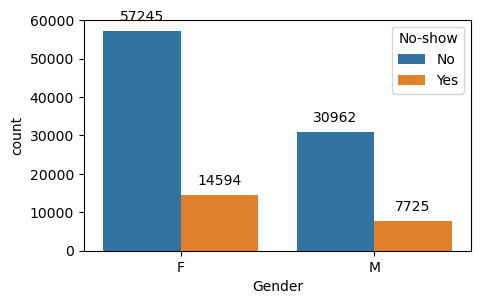

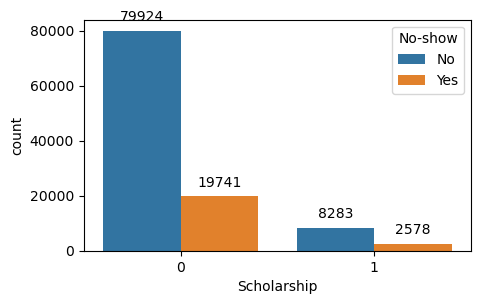

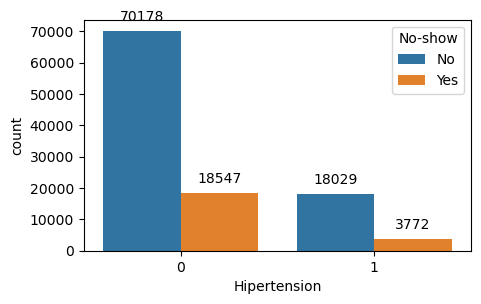

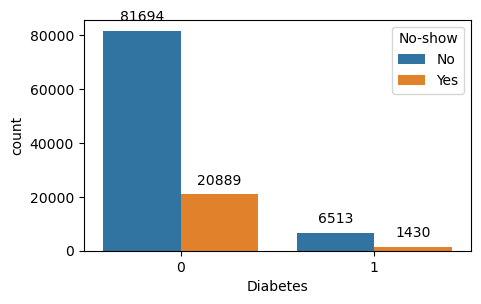

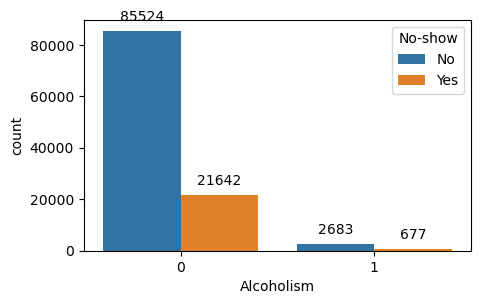

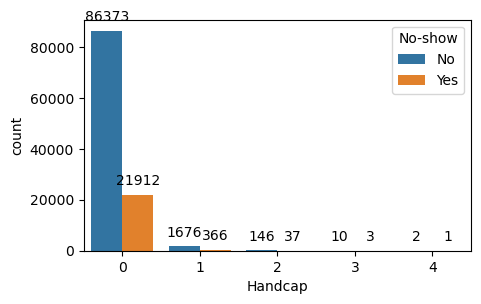

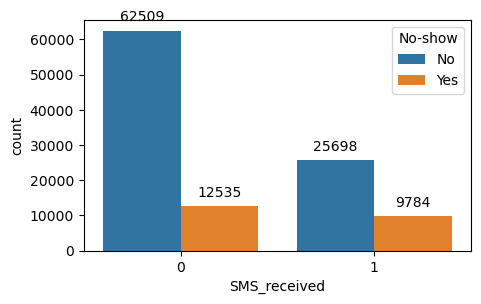

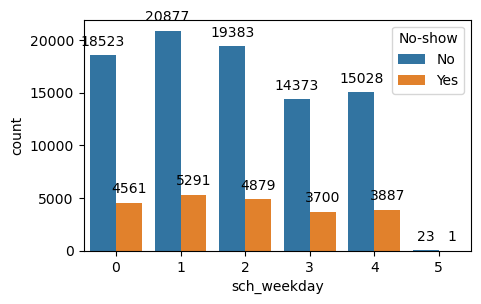

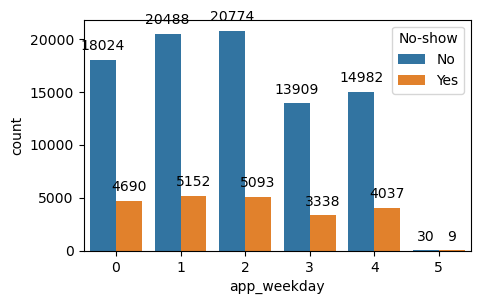

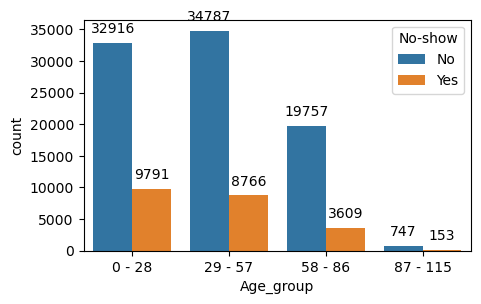

In [81]:
for i, predictor in enumerate(new_df.drop(columns=['No-show'])):
    plt.figure(i,figsize=(5,3))
    ax = sns.countplot(data=new_df, x=predictor, hue='No-show')
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.show()

####Univariate findings

1. Patients with hypertension problem are more likely to absent at appointments with absent rate of 26%.
2. Patients who are enrolled in scholarship are more likely to be absent at appointments with absent rate of 31%.
3. Patients who received messages are more likely to be absent at appointments with absent rate of 38%.
4. Patients with diabetes problem are more likely to absent at appointments with absent rate of 25%.
5. Handicapped patients and patients with diabalities are more likely to be absent at appointments. More diabilty , more absence rate.
6. Patients less than 87 years are more likely to be absent at appointments with maximum number of absentees in the range of 58 to 86 years.


In [82]:
new_df['No-show'].value_counts()

No     88207
Yes    22319
Name: No-show, dtype: int64

**2.** Convert the target variable 'No-show'  in a binary numeric variable i.e. Yes=1 ; No = 0

In [83]:
new_df['No-show'] = np.where(new_df['No-show'] == 'Yes',1,0)

**3.** Convert all the categorical variables into dummy variables

In [84]:
# For Machine Learning (Predictive Modelling), we need to perform Feature Encoding
new_df_dummies = pd.get_dummies(new_df)
new_df_dummies.head()

,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,sch_weekday,app_weekday,Gender_F,Gender_M,Age_group_0 - 28,Age_group_29 - 57,Age_group_58 - 86,Age_group_87 - 115
0,0,1,0,0,0,0,0,4,4,1,0,0,0,1,0
1,0,0,0,0,0,0,0,4,4,0,1,0,1,0,0
2,0,0,0,0,0,0,0,4,4,1,0,0,0,1,0
3,0,0,0,0,0,0,0,4,4,1,0,1,0,0,0
4,0,1,1,0,0,0,0,4,4,1,0,0,1,0,0


<Axes: >

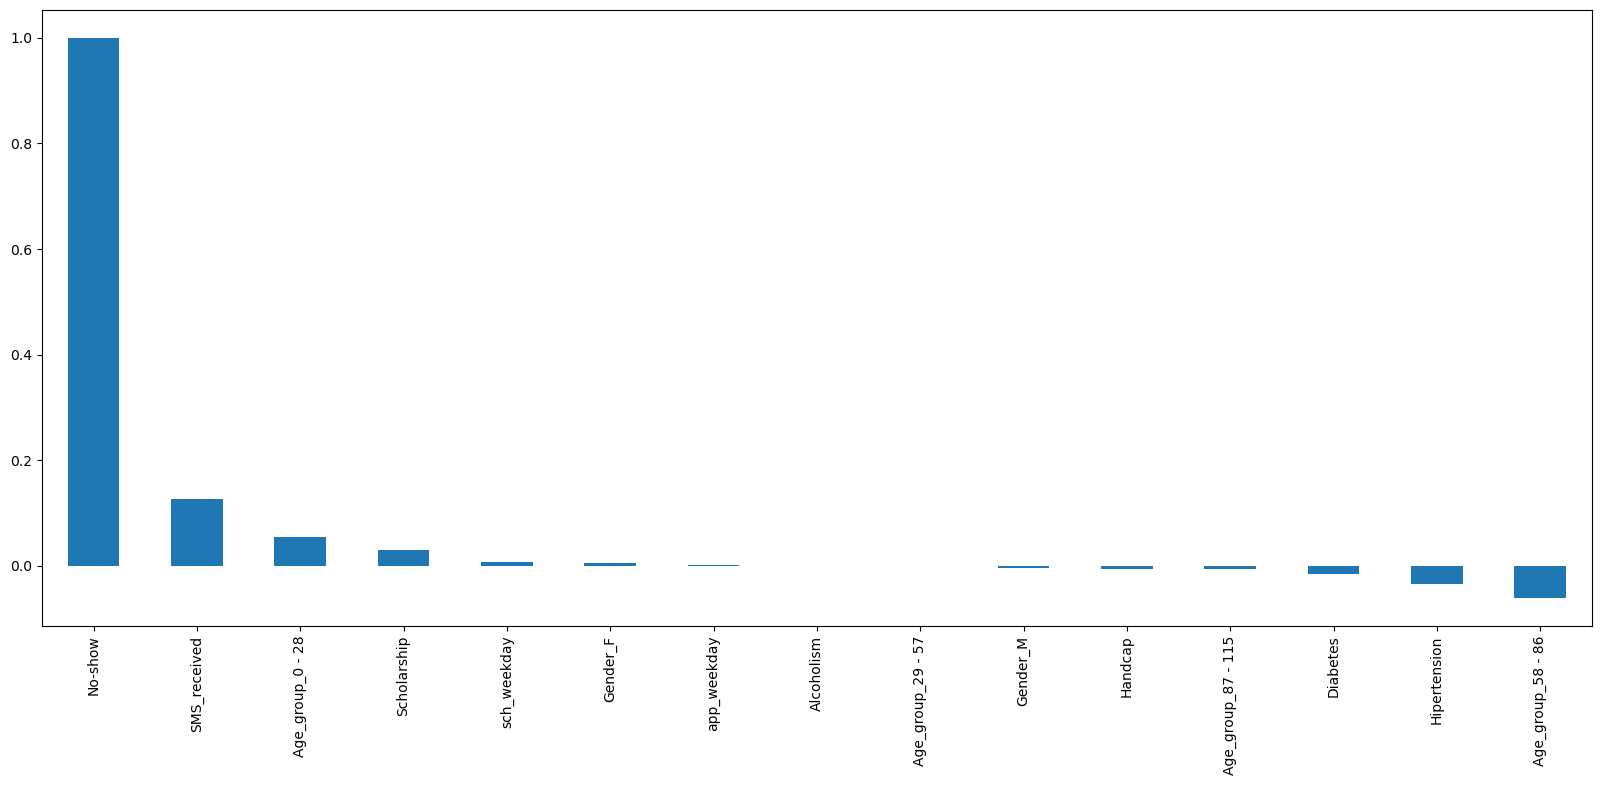

In [85]:
plt.figure(figsize=(20,8))
new_df_dummies.corr()['No-show'].sort_values(ascending = False).plot(kind='bar')

**Derived Insight: **
####Univariate findings

1. Patients with hypertension problem are more likely to absent at appointments with absent rate of 26%.
2. Patients who are enrolled in scholarship are more likely to be absent at appointments with absent rate of 31%.
3. Patients who received messages are more likely to be absent at appointments with absent rate of 38%.
4. Patients with diabetes problem are more likely to absent at appointments with absent rate of 25%.
5. Handicapped patients and patients with disabalities are more likely to be absent at appointments. More diabilty , more absence rate.
6. Patients having age between 0 to 28 and 58 to 86 years are more likely to be absent at appointments.


<Axes: >

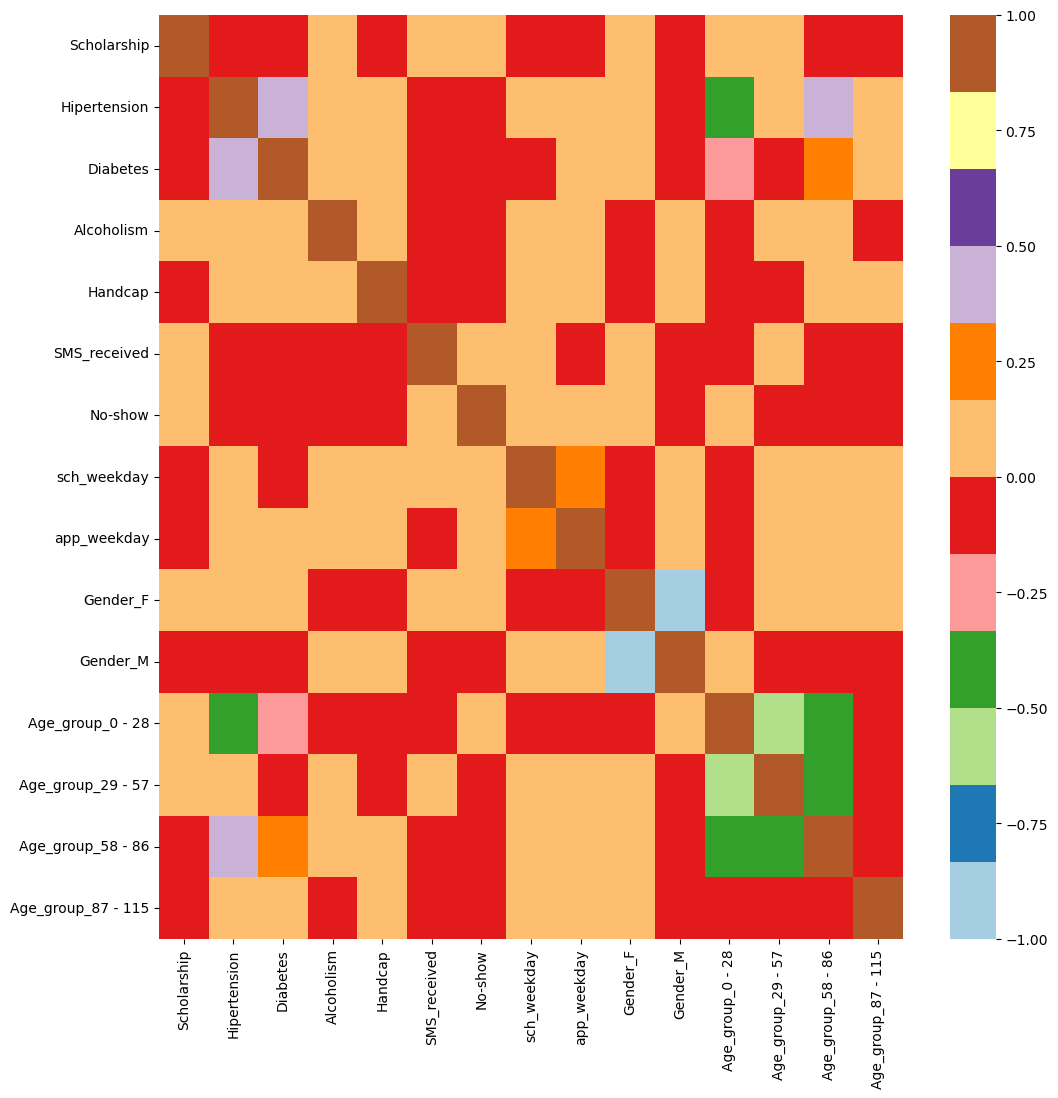

In [86]:
plt.figure(figsize=(12,12))
sns.heatmap(new_df_dummies.corr(), cmap="Paired")

### Bivariate Analysis

In [87]:
new_df1_target0=new_df.loc[new_df["No-show"]==0] 
new_df1_target1=new_df.loc[new_df["No-show"]==1] 

In [88]:
len(new_df1_target0)

88207

In [89]:
len(new_df1_target1)

22319

In [90]:
def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()

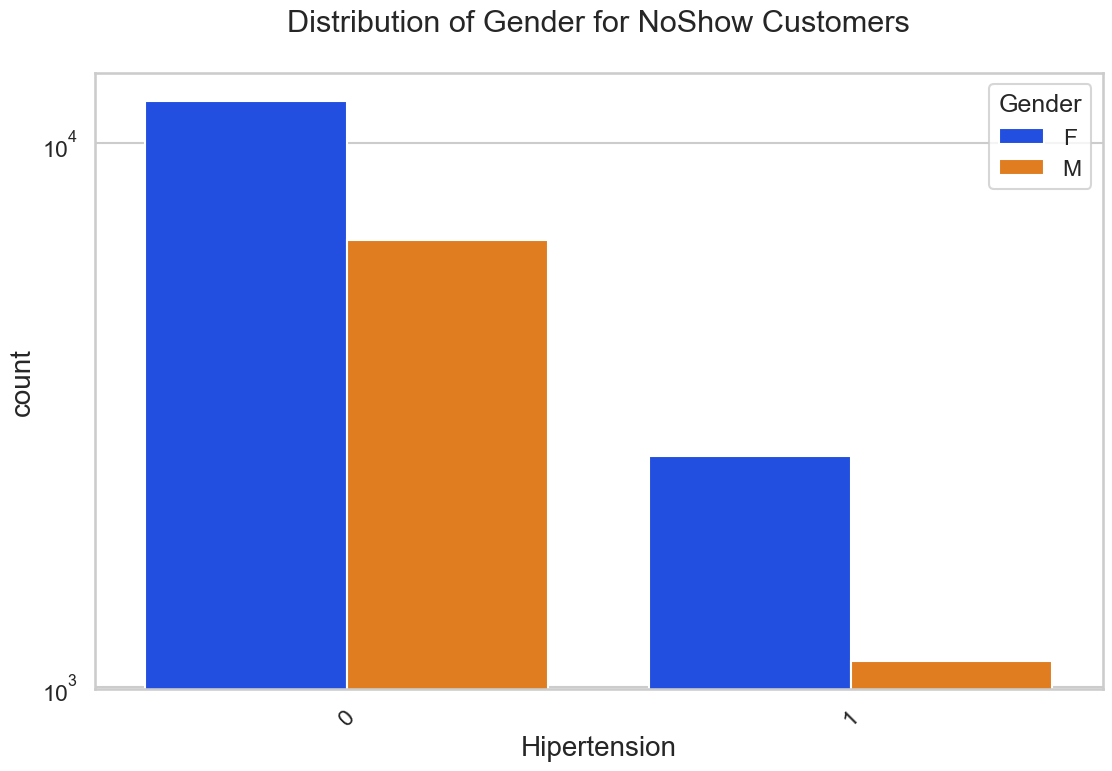

In [91]:
uniplot(new_df1_target1,col='Hipertension',title='Distribution of Gender for NoShow Customers',hue='Gender')

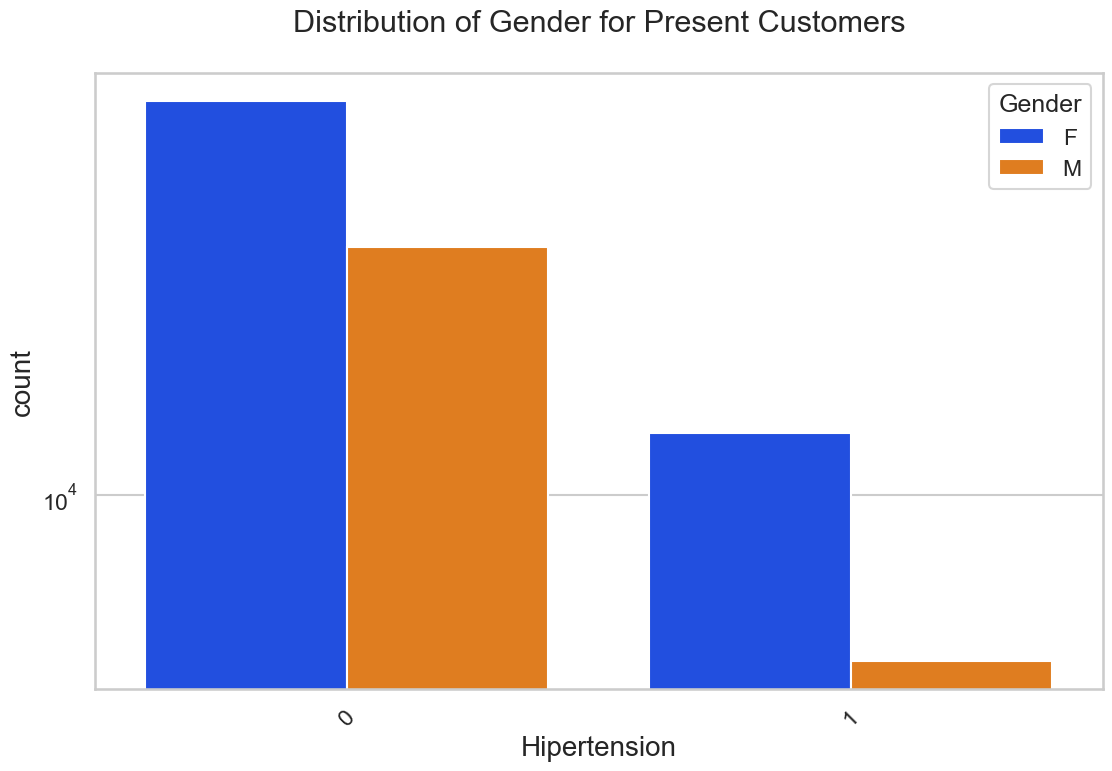

In [92]:
uniplot(new_df1_target0,col='Hipertension',title='Distribution of Gender for Present Customers',hue='Gender')


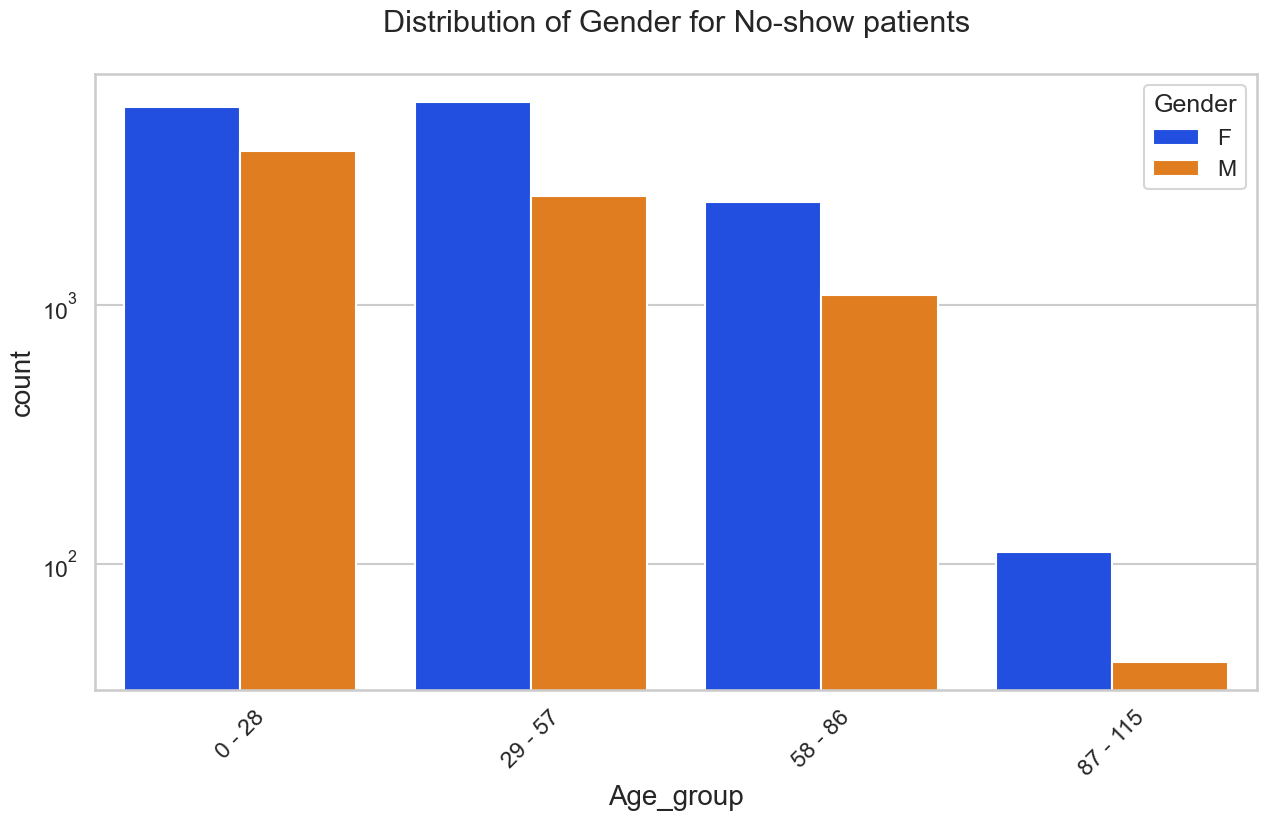

In [93]:
uniplot(new_df1_target1,col='Age_group',title='Distribution of Gender for No-show patients',hue='Gender')




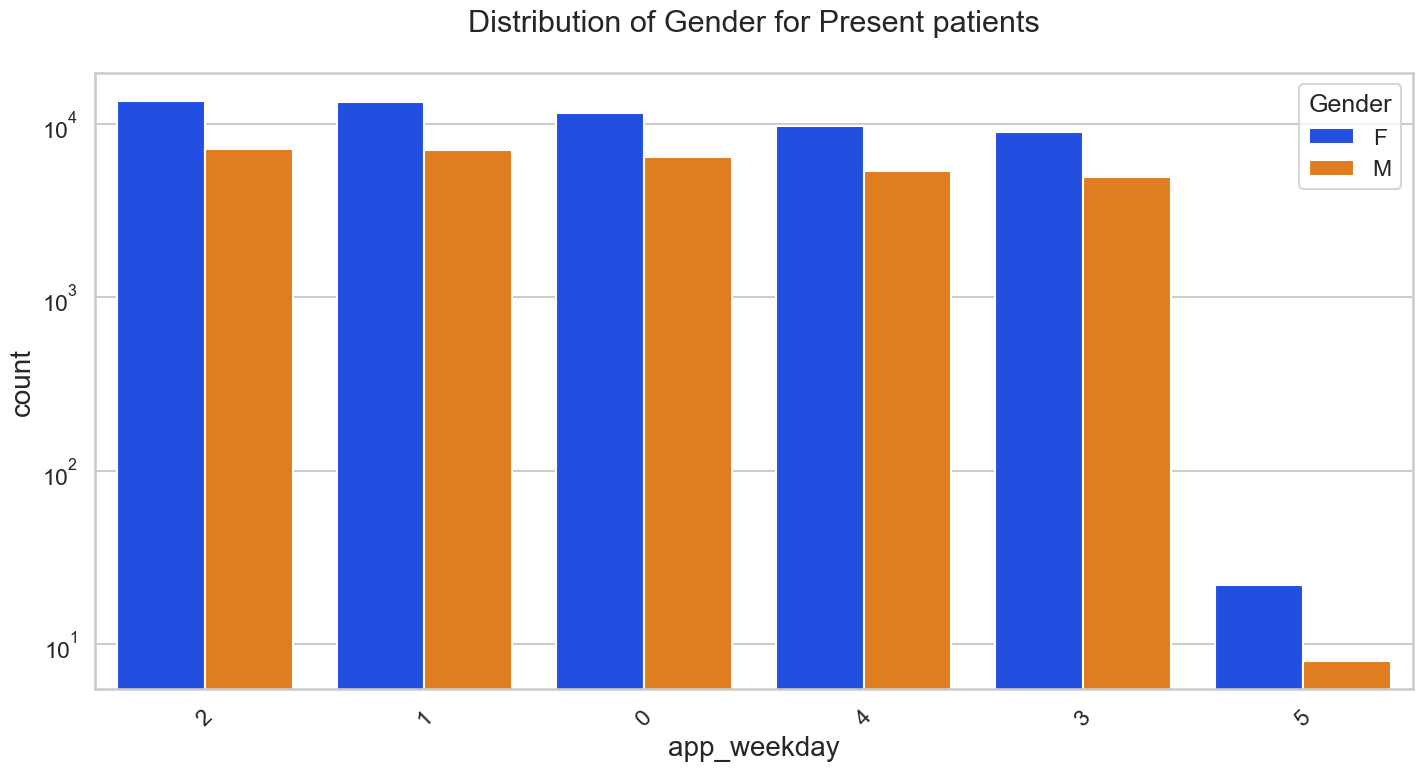

In [94]:
uniplot(new_df1_target0,col='app_weekday',title='Distribution of Gender for Present patients',hue='Gender')

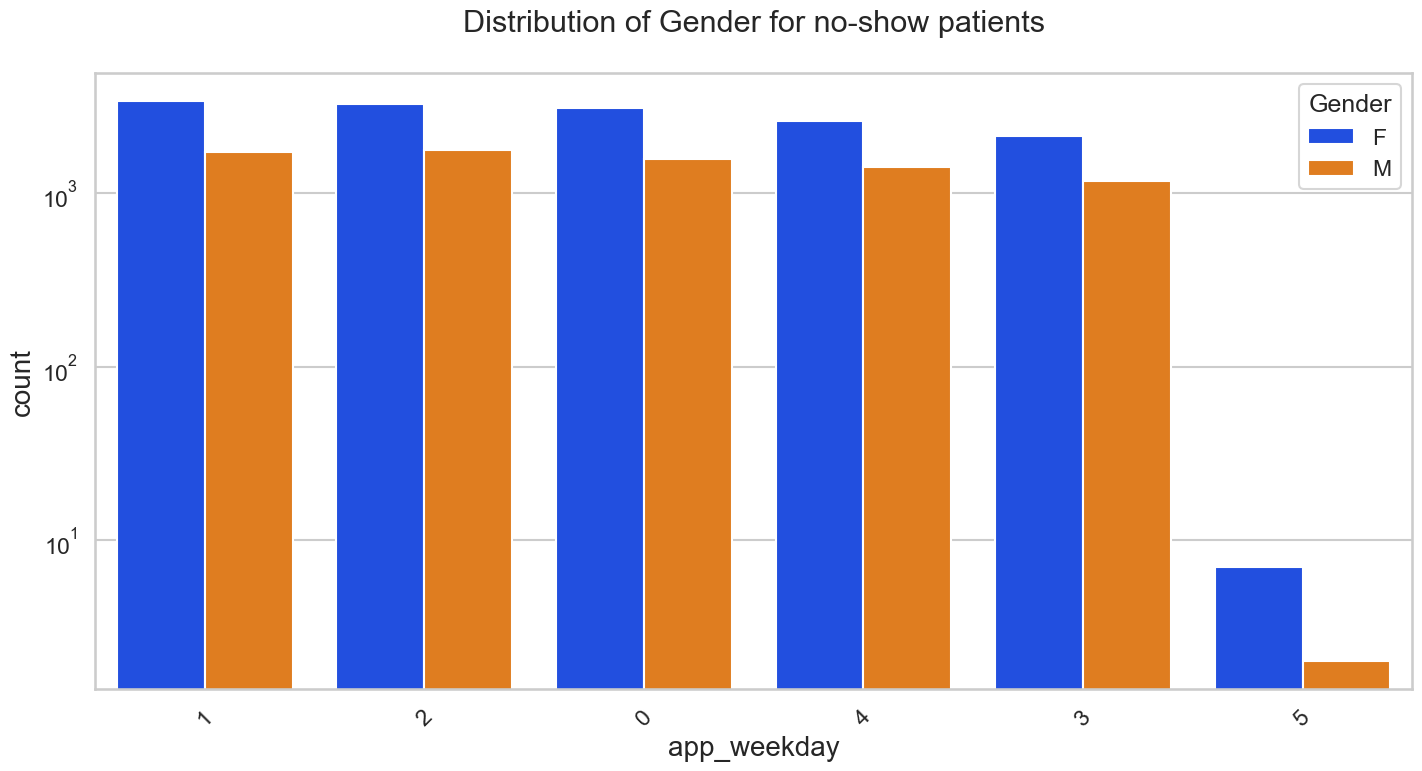

In [95]:
uniplot(new_df1_target1,col='app_weekday',title='Distribution of Gender for no-show patients',hue='Gender')

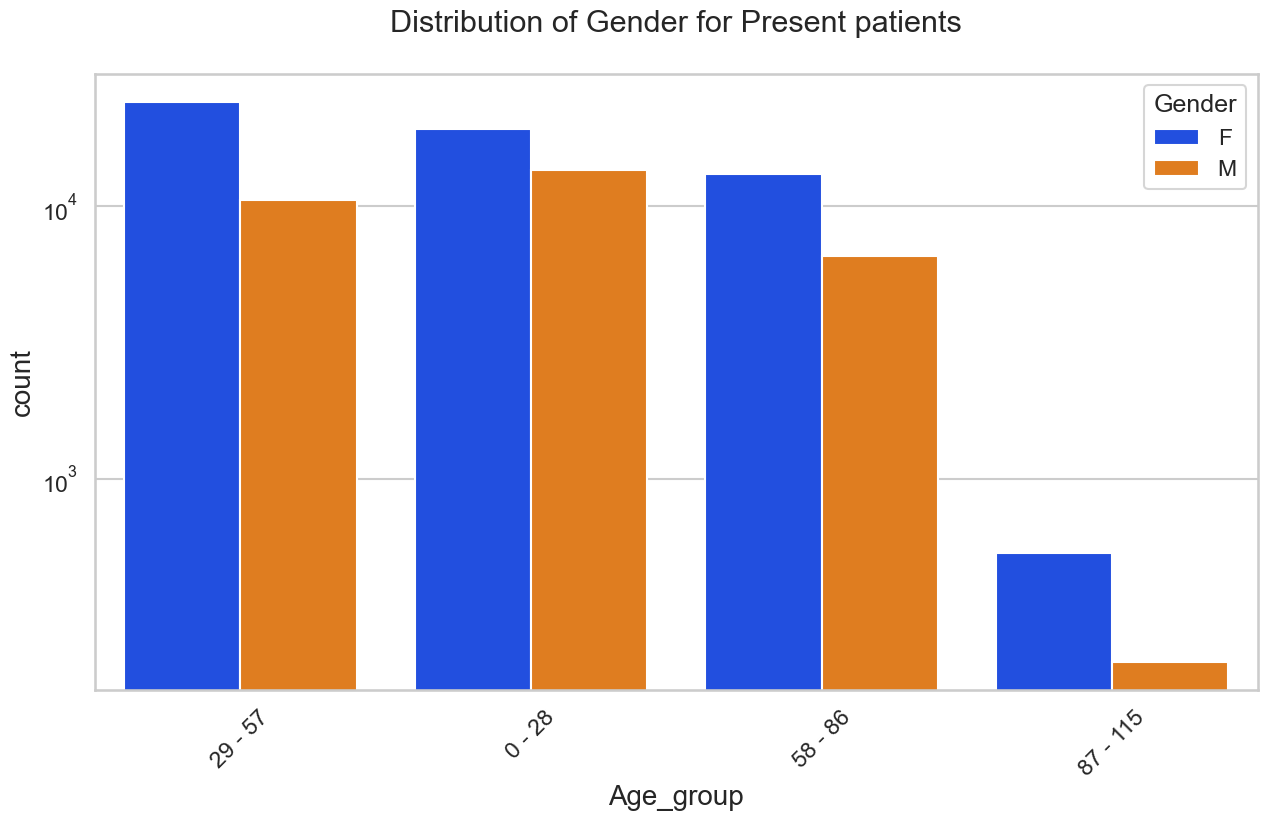

In [96]:
uniplot(new_df1_target0,col='Age_group',title='Distribution of Gender for Present patients',hue='Gender')

 #CONCLUSION
 
1. There are very less appointments on saturdays and no appointment on sunday.
2. More than 83% of patients with hypertension problem have visited at the time of appointment.  
3. Patients who are enrolled in scholarship were high absentees with absent rate of 23%. 80% of patients who are not enrolled  
   in scholarship have visited at the time of appoinyment. 
4. Females have more appointments than males.
5. Patients who received messages were high absentees.
6. Patients with high disabalities were high absentees at appointments.
7. Patients having age between 0 to 28 years were high absentees at appointments with 23% of absence rate.
8. More than 85% of Patients having age betweeen 58 - 86 years were present at appointments.
9. People having appointments on saturdays were high absentees with absence rate of 23%.
10. More than 82% of patients with diabetes problem have visited at the time of appointment. 
11. 80% of Patients with very less disabilty have visited at the time of appointment 